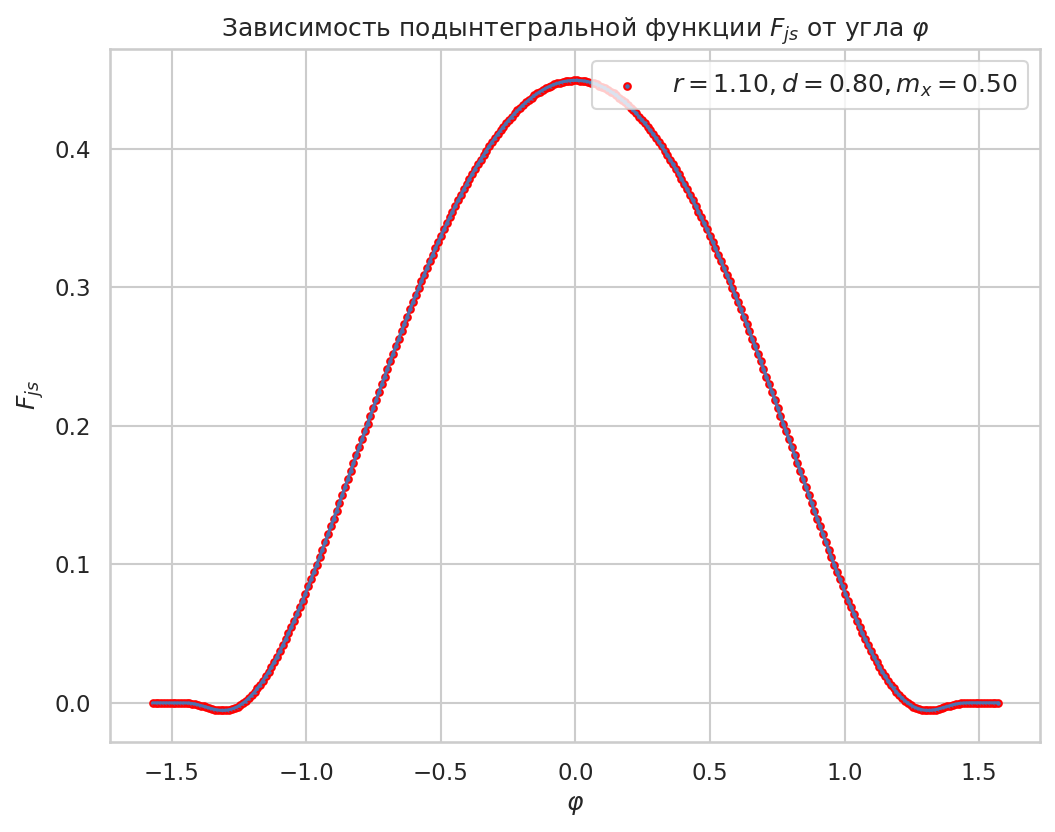

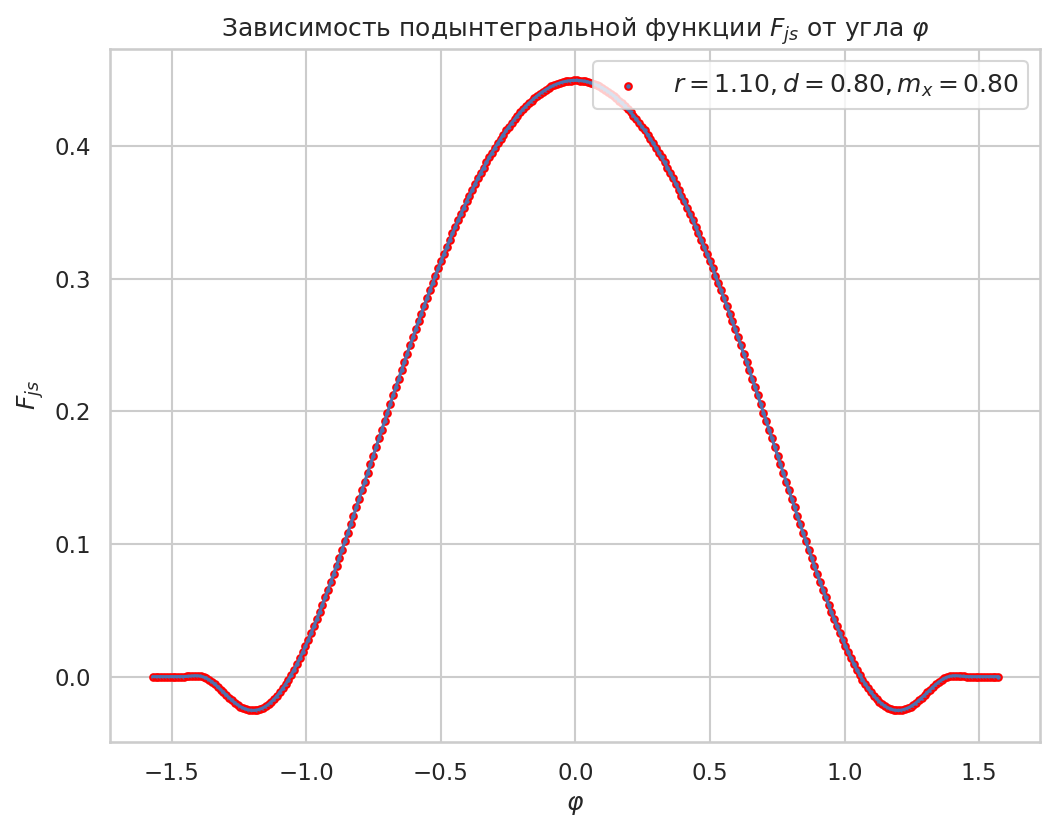

Время выполнения: 0.0019485950469970703 секунд
Интеграл js:  (0.5616726952897884, 1.3014932435451041e-08)
Время выполнения: 0.8900706768035889 секунд


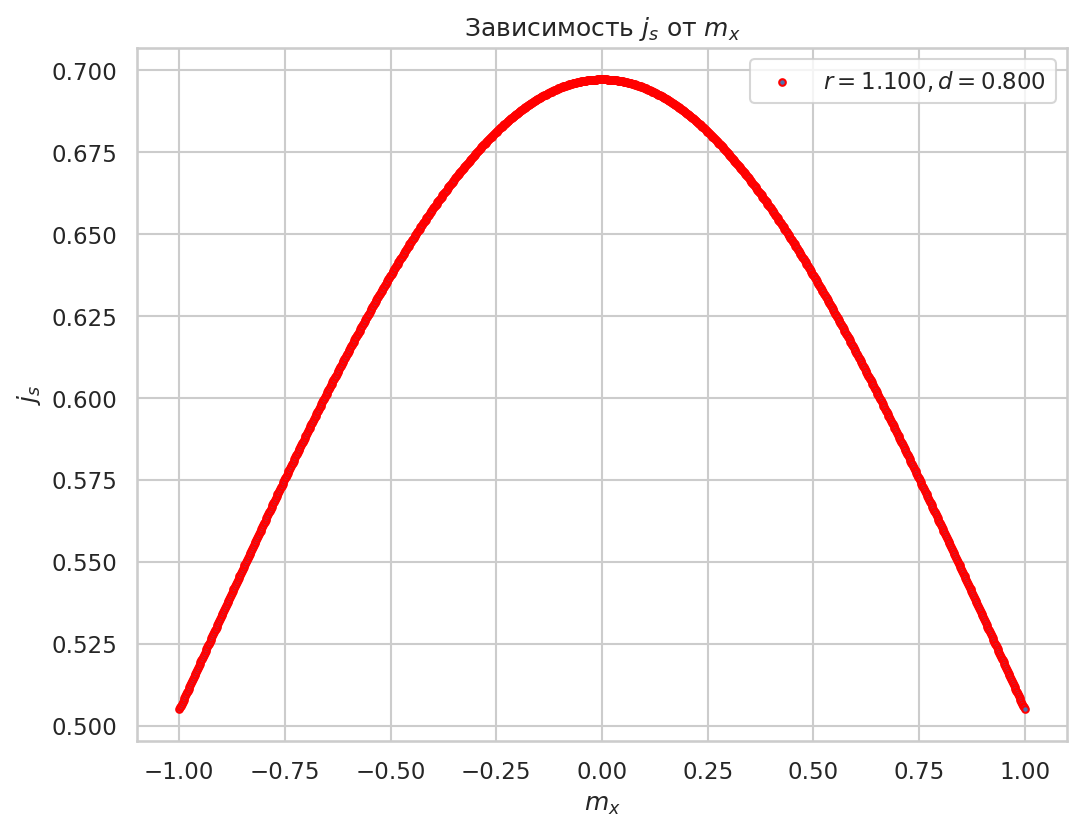

RuntimeError: 'widget is not a recognised GUI loop or backend name

In [1]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.integrate import quad

%matplotlib inline

# use seaborn plotting defaults
sns.set()
sns.set(style="whitegrid")

def funct_js(phi, mx, r, d):
    ''' Defines the integrand in the definition of current js,
        mx, r, d - parameters '''
    return (np.cos(phi) * np.exp(-d / np.cos(phi)) * np.cos(r*mx*np.tan(phi)))


d = 0.8
r = 1.1
mx = 0.5

phi = np.linspace(-np.pi/2, np.pi/2, 300, endpoint=True)

y = funct_js(phi, mx, r, d)
#print("y = ", y)

plt.figure(figsize=(8, 6), dpi=150)
plt.scatter(phi, y, edgecolor="red", s=10,
            label=r'$r=%6.2f, d=%6.2f, m_x=%6.2f$' % (r, d, mx))
plt.plot(phi, y)
plt.xlabel(r"$\varphi$")
plt.ylabel("$F_{js}$")

plt.title(r"Зависимость подынтегральной функции $F_{js}$ от угла $\varphi$")
plt.legend(loc='upper right', fontsize=12)

plt.show()

d = 0.8
r = 1.1
mx = 0.8

phi = np.linspace(-np.pi/2, np.pi/2, 300, endpoint=True)

y = funct_js(phi, mx, r, d)
#print("y = ", y)

plt.figure(figsize=(8, 6), dpi=150)
plt.scatter(phi, y, edgecolor="red", s=10,
            label=r'$r=%6.2f, d=%6.2f, m_x=%6.2f$' % (r, d, mx))
plt.plot(phi, y)
plt.xlabel(r"$\varphi$")
plt.ylabel("$F_{js}$")

plt.title(r"Зависимость подынтегральной функции $F_{js}$ от угла $\varphi$")
plt.legend(loc='upper right', fontsize=12)

plt.show()

'''python
quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50, complex_func=False)[source]
points = None,
'''
import time
from scipy.integrate import quad

start_time = time.time()
js = quad(funct_js, -np.pi/2, np.pi/2, args=(mx,r,d))
js
end_time = time.time()

# Вывод времени выполнения
print("Время выполнения: %s секунд" % (end_time - start_time))

# Результат интеграла
print("Интеграл js: ", js)

Npoint = 1000
arr_mx = np.linspace(-1, 1, Npoint, endpoint=True)
# The integral of the function in the specified interval of phi
arr_js = np.zeros(Npoint, dtype=np.float64)
# An estimate of the absolute error in the result
arr_err = np.zeros(Npoint, dtype=np.float64)

"""
plt.figure(figsize=(8, 6), dpi=150)
plt.scatter(arr_mx, arr_js, edgecolor="red", s=10,
            label=r'$r=%6.3f, d=%6.3f$' % (r, d))
plt.xlabel("$m_x$")
plt.ylabel("$j_{s}$")

plt.title("Зависимость $j_s$ от $m_x$")
plt.legend()

plt.show()
"""

start_time = time.time()

for ind in range(Npoint):
    mx = arr_mx[ind]
    arr_js[ind], arr_err[ind] = quad(funct_js, -np.pi/2, np.pi/2, args=(mx,r,d))

end_time = time.time()

# Вывод времени выполнения
print("Время выполнения: %s секунд" % (end_time - start_time))

plt.figure(figsize=(8, 6), dpi=150)
plt.scatter(arr_mx, arr_js, edgecolor="red", s=10,
            label=r'$r=%6.3f, d=%6.3f$' % (r, d))
plt.xlabel("$m_x$")
plt.ylabel("$j_{s}$")

plt.title("Зависимость $j_s$ от $m_x$")
plt.legend()

plt.show()

import ipywidgets as widgets
from ipywidgets import interact, interact_manual, Label

%matplotlib widget

@interact(mx=1.0, r=0.1, d=0.8, phi=np.pi/8)
def funct_js(phi, mx, r, d):
    ''' Defines the integrand in the definition of current js,
        mx, r, d - parameters '''
    return (np.cos(phi) * np.exp(-d / np.cos(phi)) * np.cos(r*mx*np.tan(phi)))

@interact
def show_js_mx(mx=(-1.0, 1.0, 0.1), r=(0.1, 2.0, 0.1), d=(0.1, 0.8, 0.1)):
    phi = np.linspace(-np.pi/2, np.pi/2, 300, endpoint=True)
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(phi, funct_js(phi, mx, r, d), edgecolor="red", s=10,
                label=r'$r=%6.3f, d=%6.3f$' % (r, d))
    plt.plot(phi, funct_js(phi, mx, r, d))
    plt.xlabel(r"$\varphi$", fontsize=14)
    plt.ylabel("$j_{s}$", fontsize=14)
    plt.title(r"Зависимость $f$ от угла $\varphi$", fontsize=16)
    plt.legend(loc='upper right', fontsize=13)
    plt.show()

@interact
def show_funct_js(r=(0.1, 2.0, 0.1), d=(0.1, 0.8, 0.1)):
    Npoint = 1000  # количество точек (число вызовов функции интегрирования)
    arr_mx = np.linspace(-1, 1, Npoint, endpoint=True)
    arr_js = np.zeros(Npoint, dtype=np.float64)
    arr_err = np.zeros(Npoint, dtype=np.float64)
    for ind in range(Npoint):
        mx = arr_mx[ind]
        # интегрируем для каждого
        arr_js[ind], arr_err[ind] = quad(funct_js, -np.pi/2, np.pi/2,
                                         args=(mx, r, d))

    fig = plt.figure(figsize=(8, 6))
    plt.scatter(arr_mx, arr_js, edgecolor="red", s=10,
                label=r'$r=%6.3f, d=%6.3f$' % (r, d))
    plt.xlabel("$m_x$ ", fontsize=14)
    plt.ylabel("$j_{s}$", fontsize=14)

    plt.title("Зависимость $j_s$  от параметра  $m_x$ ", fontsize=16)
    plt.legend(fontsize=13)

    plt.show()

def funct_Ix(phi, mx, r, d):
    ''' Defines the integrand in the definition of current Ix,
        mx, r, d - parameters'''
    return (np.sin(phi) * np.exp(-d / np.cos(phi)) * np.sin(r*mx*np.tan(phi)))

def funct_Iy(phi, mx, r, d):
    ''' Defines the integrand in the definition of current Iy,
        mx, r, d - parameters'''
    return (np.cos(phi) * np.exp(-d / np.cos(phi)) * np.cos(r*mx*np.tan(phi)))

@interact
def show_funct_js(r=(0.1, 2.0, 0.1), d=(0.1, 0.8, 0.1)):
    Npoint = 1000  # количество точек (число вызовов функции интегрирования)
    arr_mx = np.linspace(-1, 1, Npoint, endpoint=True)
    arr_js = np.zeros(Npoint, dtype=np.float64)
    arr_err = np.zeros(Npoint, dtype=np.float64)
    for ind in range(Npoint):
        mx = arr_mx[ind]
        # интегрируем для каждого
        arr_js[ind], arr_err[ind] = quad(funct_Ix, -np.pi/2, np.pi/2,
                                         args=(mx, r, d))

    fig = plt.figure(figsize=(8, 6))
    plt.scatter(arr_mx, arr_js, edgecolor="red", s=10,
                label=r'$r=%6.3f, d=%6.3f$' % (r, d))
    plt.xlabel("$m_x$ ", fontsize=14)
    plt.ylabel("$I_{x}$", fontsize=14)

    plt.title("Зависимость $I_x$  от параметра  $m_x$ ", fontsize=16)
    plt.legend(fontsize=13)

    plt.show()

from scipy.optimize import curve_fit

xnew = np.linspace(-1, 1, 2000, endpoint=True)

def func_P2(x, a, b, c):
    return a*x*x + b*x + c

d = 0.8
r = 1.1

Npoint = 1000
arr_mx = np.linspace(-1, 1, Npoint, endpoint=True)
arr_js = np.zeros(Npoint, dtype=np.float64)
arr_err = np.zeros(Npoint, dtype=np.float64)
# вычисление интегралов
for ind in range(Npoint):
    mx = arr_mx[ind]
    arr_js[ind], arr_err[ind] = quad(funct_js, -np.pi/2, np.pi/2,
                                     args=(mx, r, d))

popt, pcov = curve_fit(func_P2, arr_mx, arr_js)

perr = np.sqrt(np.diag(pcov))

plt.figure(figsize=(8, 5))
plt.scatter(arr_mx, arr_js, edgecolor="red", s=5,
            label=r'$r=%6.3f, d=%6.3f$' % (r, d))
plt.plot(arr_mx, func_P2(arr_mx, *popt), 'b-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel("$m_x$")
plt.ylabel("$j_{s}$")

plt.title("Зависимость $j_s$ от параметра $m_x$")
plt.legend()

plt.show()

#Аппроксимация

from scipy import odr

poly_model = odr.polynomial(8)
data = odr.Data(arr_mx, arr_js)
odr_obj = odr.ODR(data, poly_model)

# Running ODR fitting
output = odr_obj.run()

poly = np.poly1d(output.beta[::-1])
poly_y = poly(arr_mx)

plt.figure(figsize=(8, 5))
plt.scatter(arr_mx, arr_js, edgecolor="red", s=5,  label="Input data")
plt.plot(arr_mx, poly_y, label="polynomial ODR")
plt.xlabel("$m$ ")
plt.ylabel("$j_{s}$")

plt.title("Зависимость $j_s$  от параметра $m_x$")
plt.legend(fontsize=12)

plt.show()

"""
poly_model = odr.polynomial(9)
data = odr.Data(arr_mx, arr_js)
odr_obj = odr.ODR(data, poly_model)

# Running ODR fitting
output = odr_obj.run()

poly = np.poly1d(output.beta[::-1])
poly_y = poly(arr_mx)

plt.figure(figsize=(8, 5))
plt.scatter(arr_mx, arr_js, edgecolor="red", s=5,  label="Input data")
plt.plot(arr_mx, poly_y, label="polynomial ODR")
plt.xlabel("$m$ ")
plt.ylabel("$j_{s}$")

plt.title("Зависимость $j_s$  от параметра $m_x$")
plt.legend(fontsize=12)

plt.show()
"""

from scipy.integrate import solve_ivp
from functools import partial

def F_right2(t, y, omega):
    ''' Определяет правую часть ДУ примера 2
    omega - параметр'''
    return y*np.cos(omega*t)

# Параметр модели
omega = 5.  # np.pi/2
# Параметры численного счета
t0 = 0
tf = 10
nt = 1000
# Массив точек (сетка) в которых будет находится решение
t_e = np.linspace(t0, tf, nt)
# Начальное условие
y0 = np.array([3])

f = partial(F_right2, omega=omega)
t_e = np.linspace(t0, tf, nt)
sol_2 = solve_ivp(f, [t0, tf], y0, t_eval=t_e, method='RK45',
                  rtol=1e-8, atol=1e-8)

plt.figure(figsize=(8, 6))
plt.plot(sol_2.t, sol_2.y[0], label='Численное решение задачи (3) $y(t)$',
         linewidth=3.0)
plt.xlabel('t', size=16)
plt.ylabel('$y(t)$', size=12)
plt.legend(loc='upper center', fontsize=11)
plt.show()


%matplotlib inline

d = 0.3
r = 0.5

def funct_Ix(phi, mx, r, d):
    '''Defines the integrand in the definition of current Ix,
        mx, r, d - parameters'''
    return (np.sin(phi) * np.exp(-d / np.cos(phi)) * np.sin(r*mx*np.tan(phi)))

def funct_Iy(phi, mx, r, d):
    '''Defines the integrand in the definition of current Iy,
        mx, r, d - parameters'''
    return (np.cos(phi) * np.exp(-d / np.cos(phi)) * np.cos(r*mx*np.tan(phi)))

# массивы
Npoint = 1000
arr_mx = np.linspace(-1, 1, Npoint, endpoint=True)
arr_Ix = np.zeros(Npoint, dtype=np.float64)
arr_Iy = np.zeros(Npoint, dtype=np.float64)
arr_errx = np.zeros(Npoint, dtype=np.float64)
arr_erry = np.zeros(Npoint, dtype=np.float64)
# вычисление интегралов
for ind in range(Npoint):
    mx = arr_mx[ind]
    arr_Ix[ind], arr_errx[ind] = quad(funct_Ix, -np.pi/2, np.pi/2,
                                      args=(mx, r, d))
    arr_Iy[ind], arr_erry[ind] = quad(funct_Iy, -np.pi/2, np.pi/2,
                                      args=(mx, r, d))

# Using 9th order polynomial model
poly_model = odr.polynomial(9)
data = odr.Data(arr_mx, arr_Ix)
odr_obj = odr.ODR(data, poly_model)

# Running ODR fitting
output = odr_obj.run()

Ixfit = np.poly1d(output.beta[::-1])

# using 8th order polynomial model
poly_model = odr.polynomial(8)
data = odr.Data(arr_mx, arr_Iy)
odr_obj = odr.ODR(data, poly_model)

# Running ODR fitting
output = odr_obj.run()

Iyfit = np.poly1d(output.beta[::-1])


def jc0(d):
    '''Определяет функцию для критического тока при отсутсвии F слоя
    d - параметр модели'''
    result = quad(lambda phi: np.cos(phi)*np.exp(-d/np.cos(phi)),
                  -np.pi/2, np.pi/2)
    return result

Jc0 = jc0(d)
J0 = Jc0[0]

def my_sfs(t, S, G, r, alpha, wF, d, V, J0):
    '''Определяет правые части ДУ
    G, r, alpha, wF - параметры модели
    S=[mx, my, mz, ph] - искомая вектор-функция'''
    mx = S[0]
    my = S[1]
    mz = S[2]

    Jx = Ixfit(mx)
    Jy = Iyfit(mx)

    Hx = (G*r*Jx/J0)*(1-np.cos(V*t-r*my))
    Hy = (G*r*Jy/J0)*np.sin(V*t-r*my)+my
    Hz = 0

    H = [Hx, Hy, Hz]
    M = [mx, my, mz]

    m2 = np.dot(M, M)
    HdM = np.dot(H, M)

    ksi = -wF/(1+alpha*alpha*m2)

    dmx = ksi * ((my*Hz-mz*Hy) + alpha * (mx*HdM-Hx*m2))
    dmy = ksi * ((mz*Hx-mx*Hz) + alpha * (my*HdM-Hy*m2))
    dmz = ksi * ((mx*Hy-my*Hx) + alpha * (mz*HdM-Hz*m2))

    dS = [dmx, dmy, dmz]
    return dS

G = 4.5 # отношение энергии Джозефсона к энергии магнитной анизотропии
r = 0.5 # параметр спин−орбитального взаимодействия
d = 0.3 # безразмерная длина джозефсоновского перехода
wF = 1  # собственная частота ферромагнитного резонанса
alpha = 0.01 # параметр гильбертовского затухания
V = 5  # напряжение в джозефсоновском переходе

t0 = 0
tf = 1500
nt = 15000

mx0 = -0.5
mz0 = 0
my0 = np.sqrt(1-mx0*mx0-mz0*mz0)

f = partial(my_sfs, G=G, r=r, alpha=alpha, wF=wF, d=d, V=V, J0=J0)
t_e = np.linspace(t0, tf, nt)
s0 = np.array([mx0, my0, mz0])
sol_1 = solve_ivp(f, [t0, tf], s0, t_eval=t_e, method='BDF',
                  rtol=1e-8, atol=1e-8)


plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.ylim(-1.2, 1.2)
plt.plot(sol_1.t, sol_1.y[0], label='Компонента $m_x $', color='b')
plt.xlabel('t', size=16)
plt.ylabel('$m_{x}$', size=16)
plt.legend(fontsize=12)
plt.subplot(1, 3, 2)
plt.ylim(-1.2, 1.2)
plt.plot(sol_1.t, sol_1.y[1], label='Компонента $m_y $', color='g')
plt.xlabel('t', size=16)
plt.ylabel('$m_{y}$', size=16)
plt.legend(fontsize=12)
plt.subplot(1, 3, 3)
plt.ylim(-1.2, 1.2)
plt.plot(sol_1.t, sol_1.y[2], label='Компонента $m_z $', color='r')
plt.xlabel('t', size=16)
plt.ylabel('$m_{z}$', size=16)
plt.legend(fontsize=12)
plt.show()

mx0 = 0.5
mz0 = 0
my0 = np.sqrt(1-mx0*mx0-mz0*mz0)

